In [83]:
import json
with open('example-argumentation-framework.json') as user_file:
  file_contents = user_file.read()
parsed_json = json.loads(file_contents)

In [84]:
A = parsed_json['Arguments'].keys()
R = parsed_json['Attack Relations']
R = [tuple(pair) for pair in R]

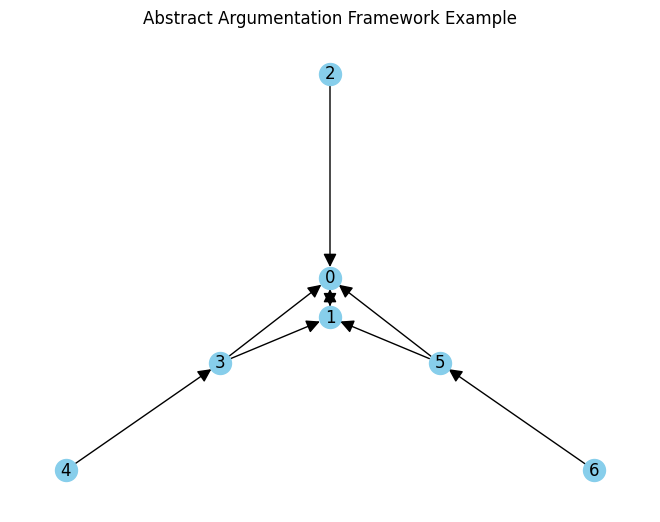

In [85]:
import matplotlib.pyplot as plt
import networkx as nx
import scipy

G = nx.DiGraph()
G.add_nodes_from(A)
G.add_edges_from(R)

pos = nx.spectral_layout(G)
nx.draw(G, pos, with_labels=True, node_size=250, node_color="skyblue", arrowsize=20)

plt.title("Abstract Argumentation Framework Example")
plt.show()

In [86]:
def get_attackers(a, R):
    possible_attackers = []
    for relation in R:
        if relation[1] == a:
            possible_attackers.append(relation[0])
    return possible_attackers

In [87]:
class ArgumentationFramework:
    def __init__(self, arguments, attacks):
        """
        arguments: a set of arguments
        attacks: a list of tuples representing attack relations (attacker, attacked)
        """
        self.arguments = arguments
        self.attacks = attacks

    def is_conflict_free(self, args):
        """ Check if a set of arguments is conflict-free """
        for arg in args:
            for attacked in args:
                if (arg, attacked) in self.attacks:
                    return False
        return True

    def defends(self, args, argument):
        """ Check if a set of arguments defends an argument """
        for attacker in self.arguments:
            if (attacker, argument) in self.attacks:
                if not any((defender, attacker) in self.attacks for defender in args):
                    return False
        return True

    def find_admissible_sets(self):
        """ Find all admissible sets in the framework """
        admissible_sets = []
        for args in self.power_set(self.arguments):
            if self.is_conflict_free(args) and all(self.defends(args, arg) for arg in args):
                admissible_sets.append(args)
        return admissible_sets

    def find_preferred_extensions(self):
        """ Find all preferred extensions """
        admissible_sets = self.find_admissible_sets()
        return [a for a in admissible_sets if not any(set(a) < set(b) for b in admissible_sets)]

    @staticmethod
    def power_set(s):
        """ Generate the power set of a set """
        s = list(s)
        x = len(s)
        for i in range(1 << x):
            yield {s[j] for j in range(x) if (i & (1 << j))}


In [88]:
arguments = A
attacks = R

framework = ArgumentationFramework(arguments, attacks)
preferred_extensions = framework.find_preferred_extensions()
print("Preferred Extensions:", preferred_extensions)

Preferred Extensions: [{'1', '2', '4', '6'}]


In [94]:
import random
AFJsonFile = "example-argumentation-framework.json"
with open(AFJsonFile, 'r') as argumenation_json:
    argumenation_json = json.load(argumenation_json)

# Get all attack relations from the json
attackRelations = argumenation_json["Attack Relations"]
attackRelations = [tuple(pair) for pair in attackRelations]

# Get all arguments from the json
arguments = argumenation_json["Arguments"]
argumentsPlayer = arguments.copy()


framework = ArgumentationFramework(arguments, attackRelations)
preferred_extensions = framework.find_preferred_extensions()
print("Preferred Extensions:", preferred_extensions)

Preferred Extensions: [{'1', '2', '4', '6'}]


In [95]:
for pre in preferred_extensions:
    print(pre)

{'1', '2', '4', '6'}


In [93]:
claimedArgument = "0"

def attackers(argument):
    possible_attackers = []
    for relation in attackRelations:
        if relation[1] == argument:
            possible_attackers.append(relation[0])
    return possible_attackers

gameOn = True

while gameOn:
    print(f"The proponent plays argument {claimedArgument} which is labelled in")
    listOfAttackers = attackers(claimedArgument)
    # Check for attacker count, if there isnt anything, player loses
    if len(listOfAttackers) == 0:
        print(" - There are no arguments to attack with, you lose, better luck next time.")
        gameOn = False
    # Otherwise the game continues
    else:
        print("How would you like to attack?\n")
        print(f"Your options are {listOfAttackers}")
        argumentInput = input("Input your attacking argument: ")
        if argumentInput in argumentsPlayer.keys():
            # Remove the played argument so that the player cant play it again
            del argumentsPlayer[argumentInput]
            # Given on the picked argument,  find an attacker of that argument
            print(f"You picked argument {argumentInput}")
            print(f"'But then in your labelling it must also be the case that {claimedArgument}'s attacker {argumentInput} is labelled out. Based on which grounds?'\n")
            # Try to find for the computer/ proponent a reasoning
            listOfAttackers = attackers(argumentInput)
            if len(listOfAttackers) == 0:
                print(f"- The proponent has no argumentation left, you win!")
                gameOn = False
                break
            else:
                # Take random attacker to players argument
                claimedArgument = random.choice(listOfAttackers)
                print(f"'{argumentInput} is labelled out because {claimedArgument} is labelled in.'\n")
        else:
            print("Not a possible argument, please take one from the provided arguments")
            print(list(arguments.keys()))

The proponent plays argument 0 which is labelled in
How would you like to attack?

Your options are ['1', '2', '3', '5']
You picked argument 1
'But then in your labelling it must also be the case that 0's attacker 1 is labelled out. Based on which grounds?'

'1 is labelled out because 0 is labelled in.'

The proponent plays argument 0 which is labelled in
How would you like to attack?

Your options are ['1', '2', '3', '5']
You picked argument 2
'But then in your labelling it must also be the case that 0's attacker 2 is labelled out. Based on which grounds?'

- The proponent has no argumentation left, you win!
